In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path="C:/Users/Karri Durga Reddy/Documents/INT375/APVillageSchedule.csv"
df=pd.read_csv(file_path)
#Summary of the DataFrame including column names,data types and non-null counts.
print(df.info())
print("Descriptive Statistics: \n",df.describe())
print("First 5 rows: \n",df.head())
print("Last 5 rows: \n",df.tail())
print("Shape of the DataFrame: \n",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17396 entries, 0 to 17395
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   state_name                             17396 non-null  object
 1   district_name                          17396 non-null  object
 2   block_tehsil_name                      17396 non-null  object
 3   village_name                           17396 non-null  object
 4   ref_village_type_name                  17396 non-null  object
 5   major_medium_scheme                    17396 non-null  object
 6   major_medium_scheme_name               5120 non-null   object
 7   geographical_area                      17396 non-null  int64 
 8   cultivable_area                        17396 non-null  int64 
 9   net_sown_area                          17396 non-null  int64 
 10  gross_irrigated_area_kharif_season     17396 non-null  int64 
 11  gross_irrigated

In [2]:
print("Null values per attribute: \n",df.isnull().sum())
#Remove duplicate rows
df_cleaned=df.drop_duplicates()
#Drop columns that contain all missing values
df_cleaned.dropna(axis=1,how='all',inplace=True)
#Fill missing values in 'major_medium_scheme_name' with "Unknown" As the major_medium_scheme_name consists of Categorical Values
df_cleaned['major_medium_scheme_name']=df_cleaned['major_medium_scheme_name'].fillna("Unknown")
print(df_cleaned.info())

Null values per attribute: 
 state_name                                   0
district_name                                0
block_tehsil_name                            0
village_name                                 0
ref_village_type_name                        0
major_medium_scheme                          0
major_medium_scheme_name                 12276
geographical_area                            0
cultivable_area                              0
net_sown_area                                0
gross_irrigated_area_kharif_season           0
gross_irrigated_area_rabi_season             0
gross_irrigated_area_perennial_season        0
gross_irrigated_area_other_season            0
gross_irrigated_area_total                   0
net_irrigated_area                           0
avg_ground_water_level_pre_monsoon           0
avg_ground_water_level_post_monsoon          0
ref_selection_wua_exists_name                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17396 entries, 

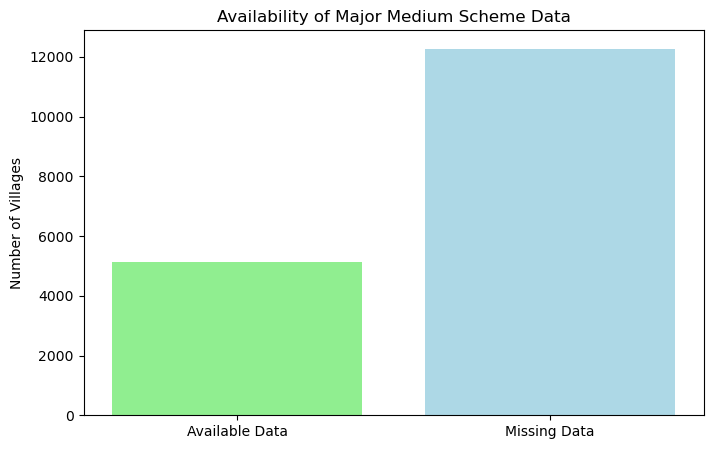

In [3]:
#1. Analyze the completeness of Major Medium Scheme data by comparing available and missing entries.
plt.figure(figsize=(8, 5))
missing_scheme = df["major_medium_scheme_name"].isnull().sum()
available_scheme = df["major_medium_scheme_name"].notnull().sum()
plt.bar(["Available Data", "Missing Data"], [available_scheme, missing_scheme], color=["lightgreen", "lightblue"])
plt.title("Availability of Major Medium Scheme Data")
plt.ylabel("Number of Villages")
plt.show()

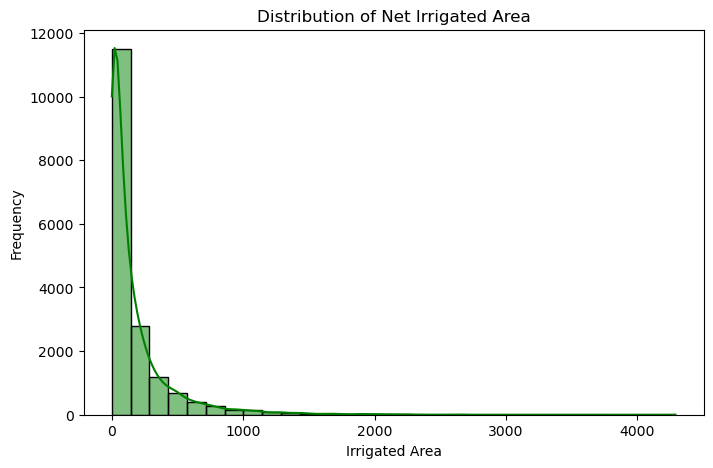

In [4]:
#2. Distribution of Net Irrigated Area.
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["net_irrigated_area"], bins=30, kde=True, color="green")
plt.title("Distribution of Net Irrigated Area")
plt.xlabel("Irrigated Area")
plt.ylabel("Frequency")
plt.show()

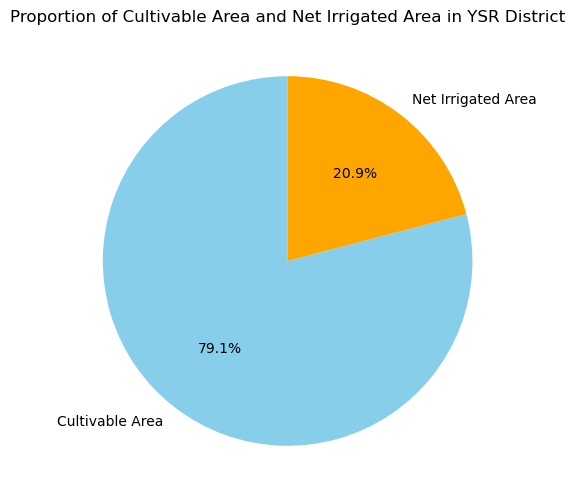

In [5]:
#3. Compare the proportion of Cultivable Area and Net Irrigated Area in YSR District.
cultivable_area = df_cleaned[df_cleaned["district_name"] == "YSR"]["cultivable_area"].sum()
net_irrigated_area = df_cleaned[df_cleaned["district_name"] == "YSR"]["net_irrigated_area"].sum()
labels = ["Cultivable Area", "Net Irrigated Area"]
sizes = [cultivable_area, net_irrigated_area]
colors = ["skyblue", "orange"]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Proportion of Cultivable Area and Net Irrigated Area in YSR District")
plt.show()

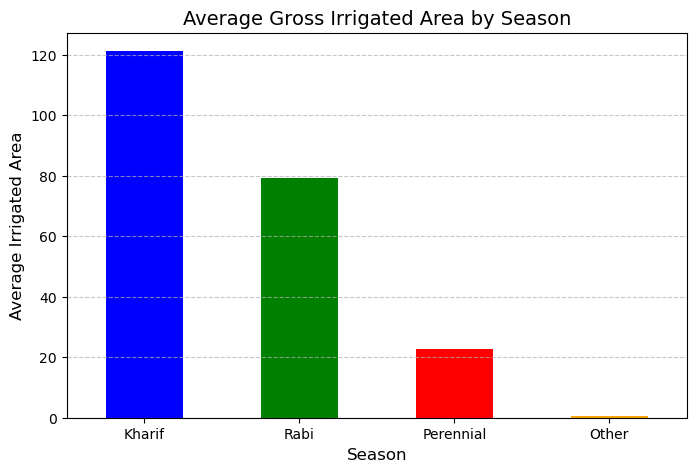

In [6]:
#4. Average Gross Irrigated Area by Season.
df_seasonal_irrigation = df_cleaned[[
    "gross_irrigated_area_kharif_season", 
    "gross_irrigated_area_rabi_season", 
    "gross_irrigated_area_perennial_season", 
    "gross_irrigated_area_other_season"
]]
df_seasonal_irrigation.columns = ["Kharif", "Rabi", "Perennial", "Other"]
df_seasonal_irrigation.mean().plot(kind="bar", figsize=(8, 5), color=["blue", "green", "red", "orange"])
plt.title("Average Gross Irrigated Area by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Irrigated Area", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Show plot
plt.show()

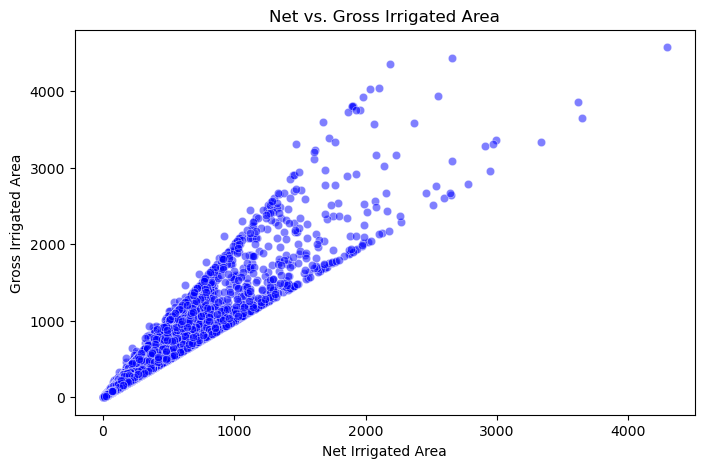

In [7]:
#5. Explore variations between Net and Gross Irrigated area.
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["net_irrigated_area"], y=df_cleaned["gross_irrigated_area_total"],color='blue',alpha=0.5)
plt.title("Net vs. Gross Irrigated Area")
plt.xlabel("Net Irrigated Area")
plt.ylabel("Gross Irrigated Area")
plt.show()

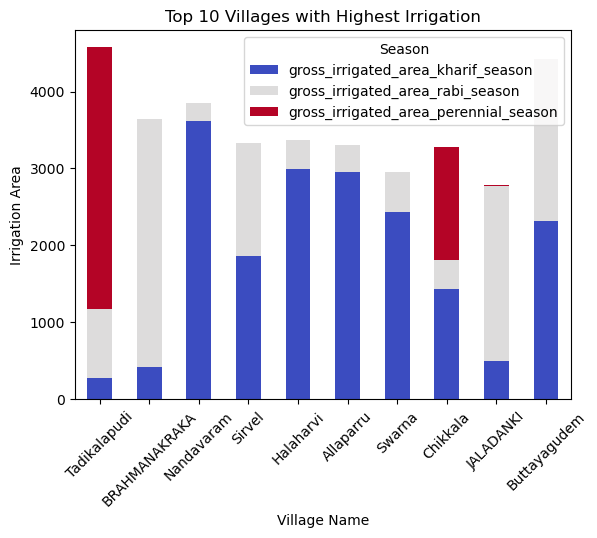

In [8]:
#6. Top 10 Most Irrigated Villages by Season.
top_villages = df_cleaned.nlargest(10, "net_irrigated_area")[["village_name", "gross_irrigated_area_kharif_season", 
                                                       "gross_irrigated_area_rabi_season", "gross_irrigated_area_perennial_season"]]
top_villages.set_index("village_name").plot(kind="bar", stacked=True, colormap="coolwarm")
plt.title("Top 10 Villages with Highest Irrigation")
plt.xlabel("Village Name")
plt.ylabel("Irrigation Area")
plt.xticks(rotation=45)
plt.legend(title="Season")
plt.show()

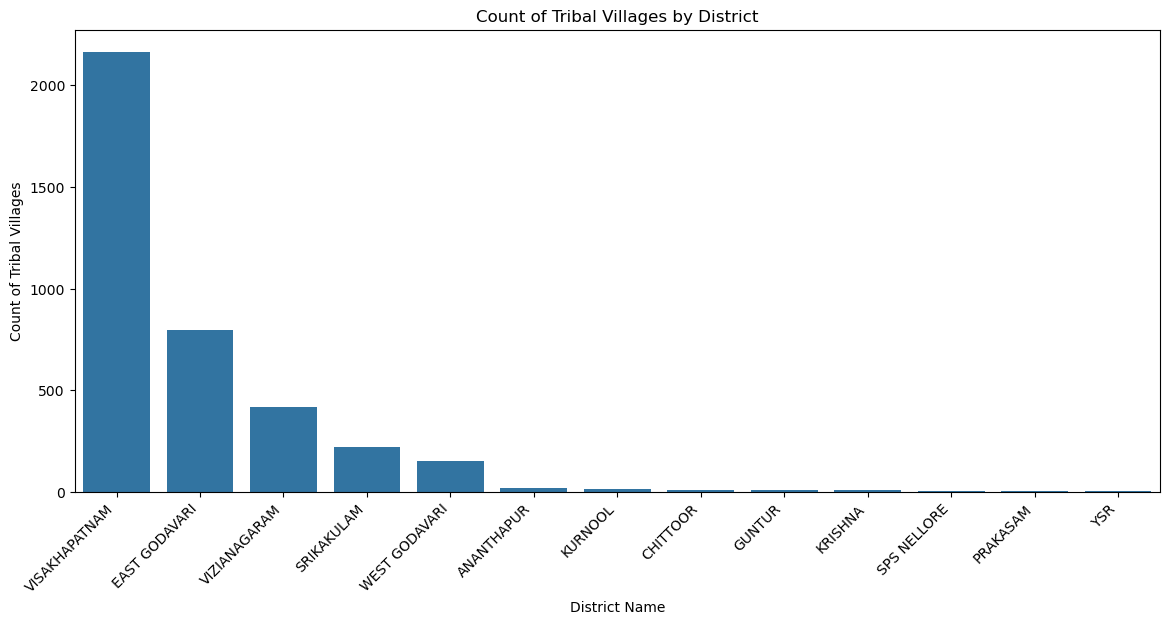

In [9]:
#7. Count of Tribal Villages by District.
tribal_villages = df_cleaned[df_cleaned["ref_village_type_name"] == "Tribal"]
plt.figure(figsize=(14, 6))
sns.countplot(x="district_name", data=tribal_villages,order=tribal_villages["district_name"].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title("Count of Tribal Villages by District")
plt.xlabel("District Name")
plt.ylabel("Count of Tribal Villages")
plt.show()

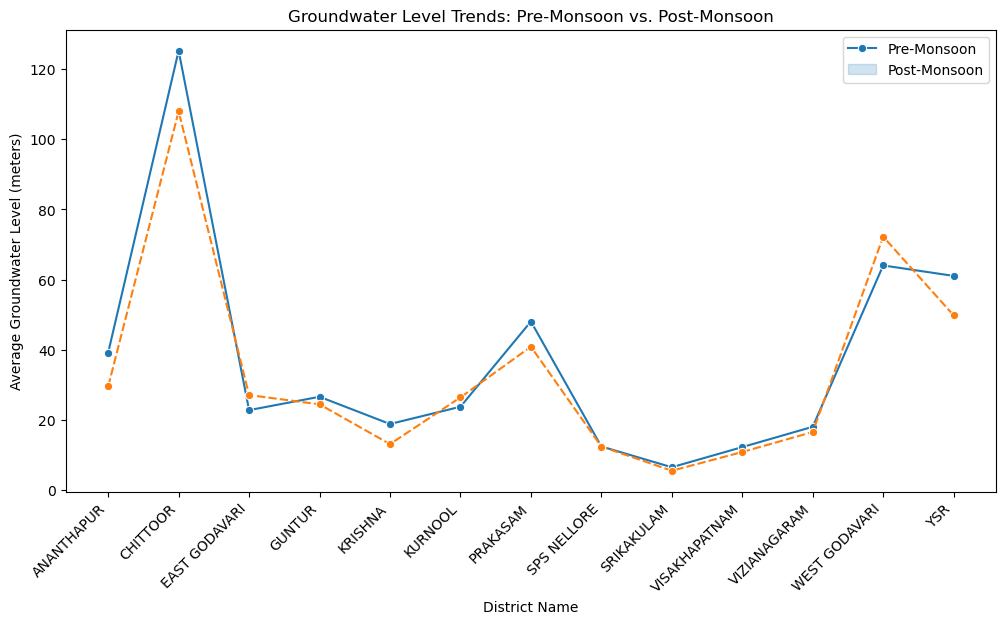

In [10]:
#8. Compare Groundwater Levels Pre vs Post Monsoon Across Districts.
groundwater_trend = df_cleaned.groupby("district_name")[["avg_ground_water_level_pre_monsoon", "avg_ground_water_level_post_monsoon"]].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=groundwater_trend, marker="o")
plt.title("Groundwater Level Trends: Pre-Monsoon vs. Post-Monsoon")
plt.xlabel("District Name")
plt.ylabel("Average Groundwater Level (meters)")
plt.xticks(rotation=45, ha="right")
plt.legend(["Pre-Monsoon", "Post-Monsoon"])
plt.show()

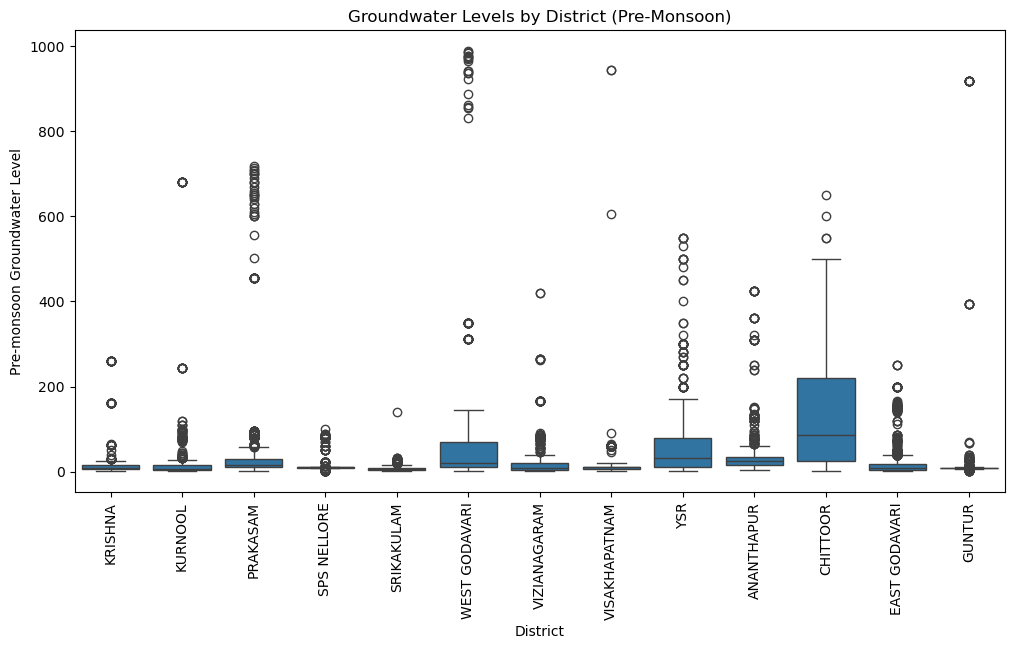

In [11]:
#9. Average Pre-Monsoon Groundwater Levels by District.
plt.figure(figsize=(12, 6))
sns.boxplot(x="district_name", y="avg_ground_water_level_pre_monsoon", data=df_cleaned)
plt.xticks(rotation=90)
plt.title("Groundwater Levels by District (Pre-Monsoon)")
plt.xlabel("District")
plt.ylabel("Pre-monsoon Groundwater Level")
plt.show()

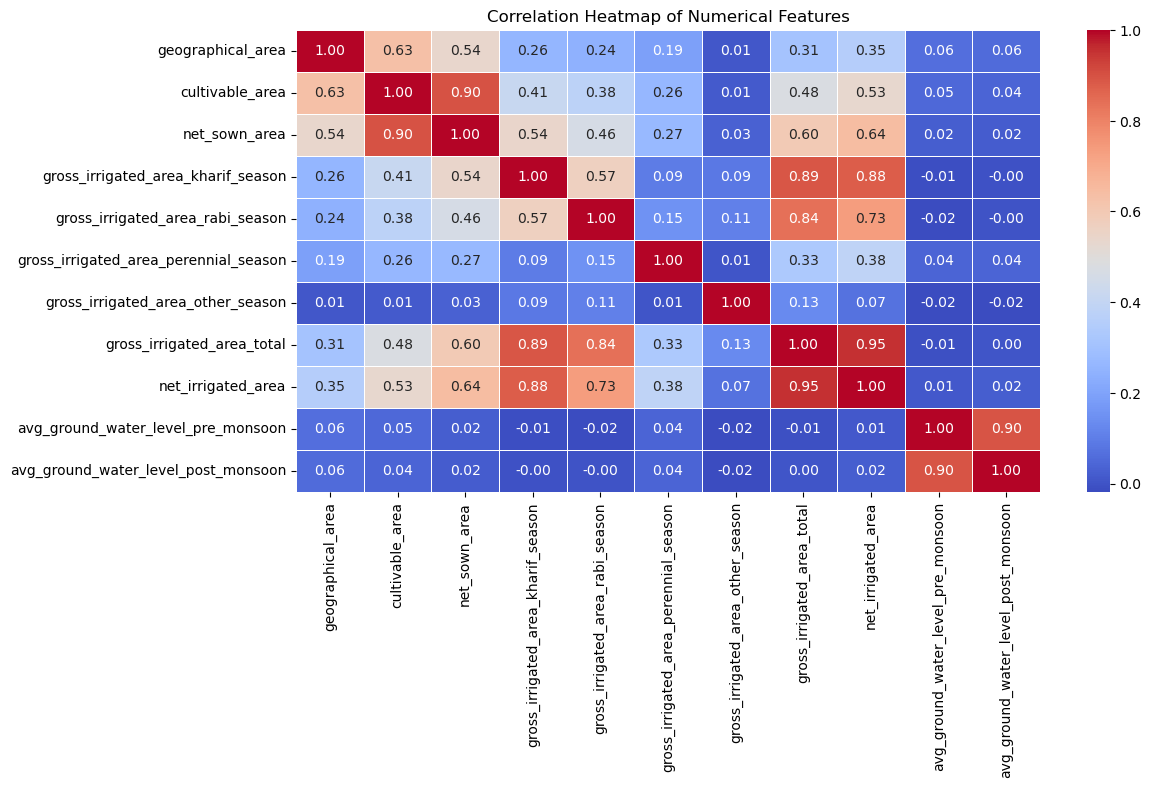

In [12]:
#10. Heatmap Correlation Between Numerical Features
numerical_df = df_cleaned.select_dtypes(include=["number"])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [13]:
from scipy.stats import zscore
columns = [
    'geographical_area',
    'cultivable_area',
    'net_sown_area',
    'gross_irrigated_area_kharif_season',
    'gross_irrigated_area_rabi_season',
    'gross_irrigated_area_perennial_season',
    'gross_irrigated_area_other_season',
    'gross_irrigated_area_total',
    'net_irrigated_area',
    'avg_ground_water_level_pre_monsoon',
    'avg_ground_water_level_post_monsoon'
]
df_zscore = df_cleaned[columns].apply(zscore)
threshold = 3
outliers = df_cleaned[(np.abs(df_zscore) > threshold).any(axis=1)]
print("Outliers detected using Z-score:")
print(outliers)

Outliers detected using Z-score:
           state_name district_name block_tehsil_name       village_name  \
9      ANDHRA PRADESH       KRISHNA     Pamidimukkala             Meduru   
12     ANDHRA PRADESH       KRISHNA     Thotlavalluru      North Valluru   
16     ANDHRA PRADESH       KRISHNA     Thotlavalluru      South Valluru   
31     ANDHRA PRADESH       KRISHNA            Guduru          Kankatava   
34     ANDHRA PRADESH       KRISHNA      Gudlavalleru          Vinnakota   
...               ...           ...               ...                ...   
17358  ANDHRA PRADESH    ANANTHAPUR         Tadimarri         Kunukuntla   
17362  ANDHRA PRADESH    ANANTHAPUR            Kadiri            Alampur   
17367  ANDHRA PRADESH    ANANTHAPUR          Talupula  Peddannavaripalle   
17370  ANDHRA PRADESH    ANANTHAPUR            Kadiri         Kadiri (R)   
17391  ANDHRA PRADESH    ANANTHAPUR         Penukonda          Penukonda   

      ref_village_type_name major_medium_scheme  \
9  